In [29]:
# creating a Pandas DataFrame 
# using read_csv function that reads from a csv file.

In [30]:
from sklearn import tree
import pandas as pd
import os 
import graphviz 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


In [31]:
 
#file_handler = open("Purchases2.csv")
# creating a Pandas DataFrame 
# using read_csv function that 
# reads from a csv file. 
data = pd.read_csv("Purchases2.csv") 
# closing the file handler 

 #creating a dict file  
#gender = {'Male': 1,'Female': 0} 
#data.Gender = [gender[item] for item in data.Gender] 
#print(data) 


In [32]:
#export_csv = df.to_csv('Gender.csv')

In [33]:
#Reading in the changed CSV file with Male = 1 and Female is 2
df3 = pd.read_csv("Gender.csv")
df3.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,35,57000,0
1,1,58,95000,1
2,1,26,80000,0
3,0,34,115000,0
4,1,33,41000,0


In [34]:
target = df3["Purchased"]
target_names = ["Purchased", "Did Not Purchase"]

In [35]:
data = df3.drop("Purchased", axis=1)
feature_names = data.columns
data.head()

,Gender,Age,EstimatedSalary
0,1,35,57000
1,1,58,95000
2,1,26,80000
3,0,34,115000
4,1,33,41000


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=100)

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.88

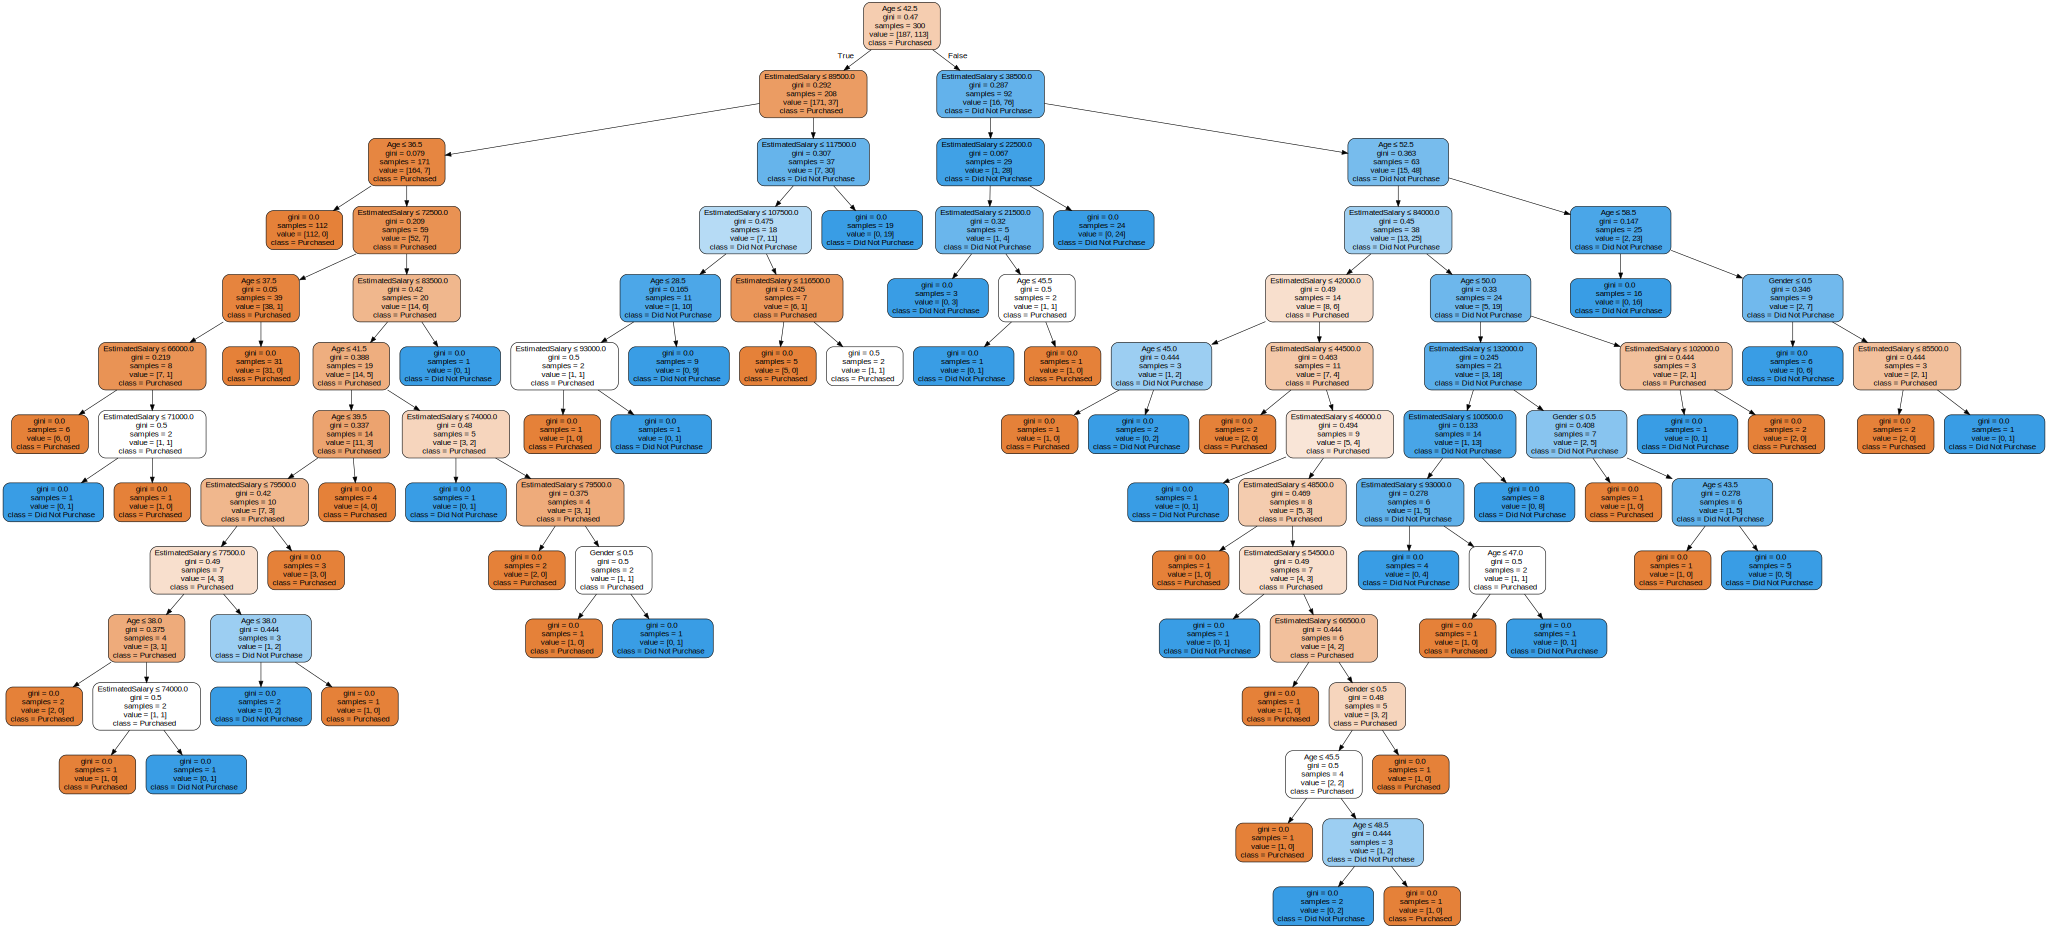

In [38]:
from graphviz import Graph
g=Graph(format='png')
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.93

In [40]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5101420965980527, 'Age'),
 (0.4754218703661046, 'EstimatedSalary'),
 (0.014436033035842516, 'Gender')]

Using K-Nearest Neighbor to test the data 

k: 1, Train/Test Score: 0.997/0.790
k: 3, Train/Test Score: 0.897/0.850
k: 5, Train/Test Score: 0.867/0.800
k: 7, Train/Test Score: 0.857/0.830
k: 9, Train/Test Score: 0.843/0.790
k: 11, Train/Test Score: 0.840/0.800
k: 13, Train/Test Score: 0.827/0.790
k: 15, Train/Test Score: 0.810/0.810
k: 17, Train/Test Score: 0.820/0.850
k: 19, Train/Test Score: 0.793/0.870


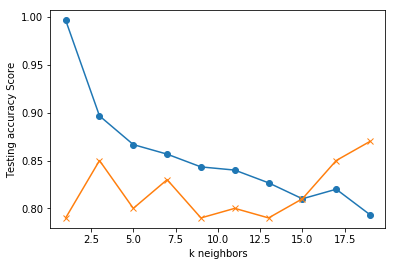

In [41]:
# Loop through different k values to see which has the highest accuracy
#Reason to use odd numbers is because of not wanting ties
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=6 Test Acc: %.3f' % knn.score(X_test, y_test))

k=6 Test Acc: 0.790


Using Logistic regression model to test the data.


In [56]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=400, verbose = 1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [57]:
classifier.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [58]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6233333333333333
Testing Data Score: 0.7


In [59]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:20]}")
print(f"First 10 Actual labels: {y_test[:20].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]


In [60]:
from sklearn.metrics import confusion_matrix
#pd.DataFrame({"Prediction": predictions, "Actual": y_test})#.reset_index(drop=True)
df_confusion = pd.crosstab(y_test, predictions, rownames = ['Actuals'], colnames = ['Predicted'], margins = True)
confusion_matrix(y_test, predictions)


array([[70,  0],
       [30,  0]], dtype=int64)